In [1]:
import autoroot
import autorootcwd
import os
from pathlib import Path
import kagglehub

project_cache = Path("./data").resolve()
os.environ["KAGGLEHUB_CACHE"] = str(project_cache)

path = kagglehub.dataset_download("altavish/boston-housing-dataset")
print("Path to dataset files:", path)


c:\Users\omras\miniconda3\envs\linal\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 11.7k/11.7k [00:00<00:00, 6.81MB/s]

Extracting files...
Path to dataset files: E:\Om\ds5020_linal_and_prob\project\data\datasets\altavish\boston-housing-dataset\versions\1


In [5]:
import pandas as pd

# Define the path to the CSV file
# Assuming the CSV file is in the same directory as the notebook or a 'data' subdirectory
csv_file_path = r'data\datasets\altavish\boston-housing-dataset\versions\1\HousingData.csv' # Or 'data/boston_housing.csv' if in a 'data' folder

# Open the CSV file with pandas
try:
    df = pd.read_csv(csv_file_path)
    print("CSV loaded successfully. Performing explorations...\n")

    # Basic explorations
    print("First 5 rows of the DataFrame:")
    print(df.head())
    print("\n")

    print("DataFrame Info (data types, non-null counts):")
    df.info()
    print("\n")

    print("Descriptive statistics of numerical columns:")
    print(df.describe())
    print("\n")

    print("Count of missing values per column:")
    print(df.isnull().sum())

except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found. Please ensure the path is correct and the file exists.")
except Exception as e:
    print(f"An error occurred: {e}")


CSV loaded successfully. Performing explorations...

First 5 rows of the DataFrame:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


DataFrame Info (data types, non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 

In [6]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

# Explanations for the Boston Housing dataset features:
*   **CRIM**: per capita crime rate by town
*   **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
*   **INDUS**: proportion of non-retail business acres per town
*   **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
*   **NOX**: nitric oxides concentration (parts per 10 million)
*   **RM**: average number of rooms per dwelling
*   **AGE**: proportion of owner-occupied units built prior to 1940
*   **DIS**: weighted distances to five Boston employment centres
*   **RAD**: index of accessibility to radial highways
*   **TAX**: full-value property-tax rate per $10,000
*   **PTRATIO**: pupil-teacher ratio by town
*   **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*   **LSTAT**: % lower status of the population
*   **MEDV**: Median value of owner-occupied homes in $1000s (target variable)


In [7]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

In [8]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


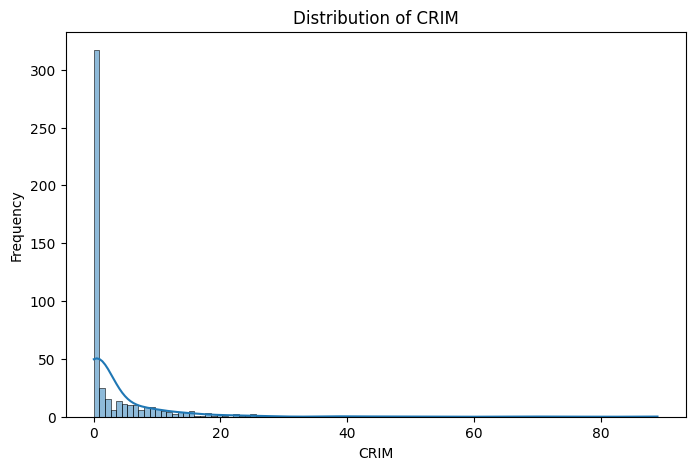

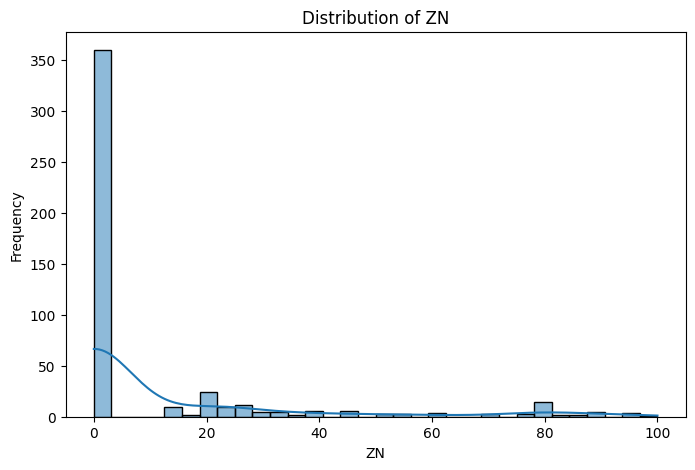

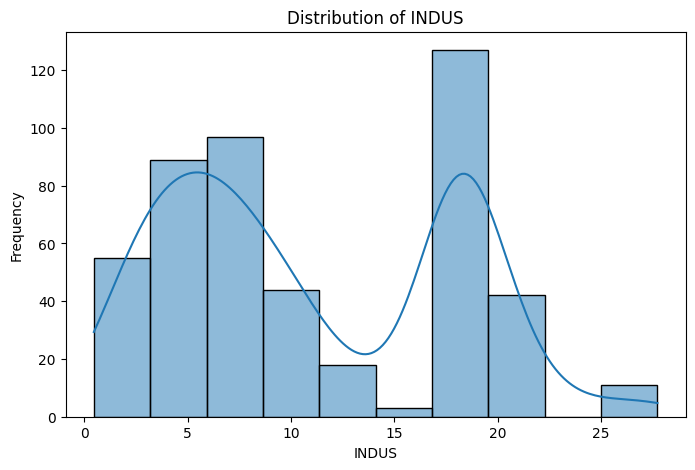

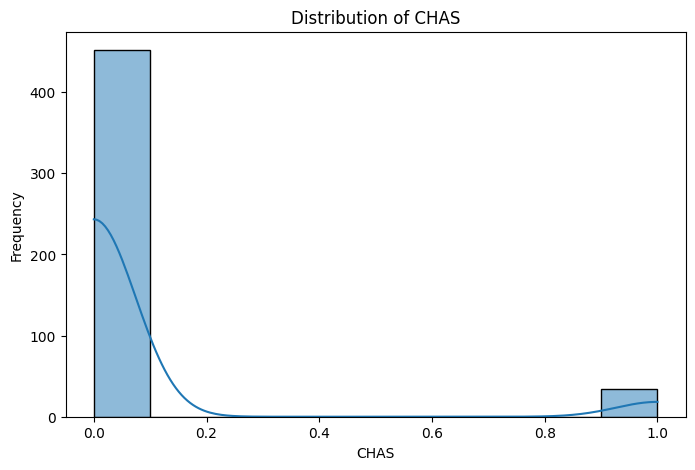

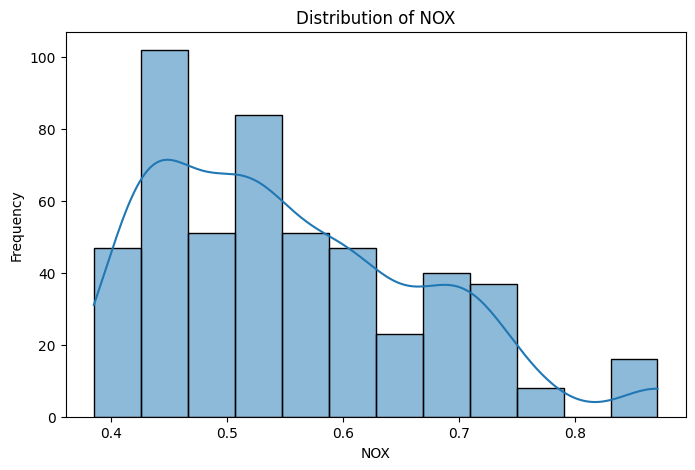

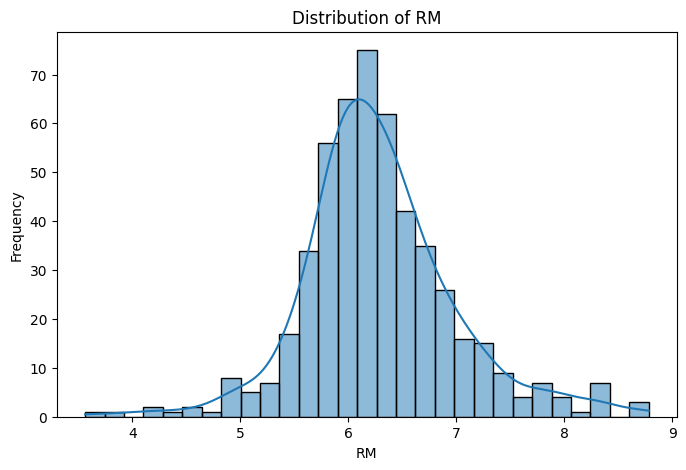

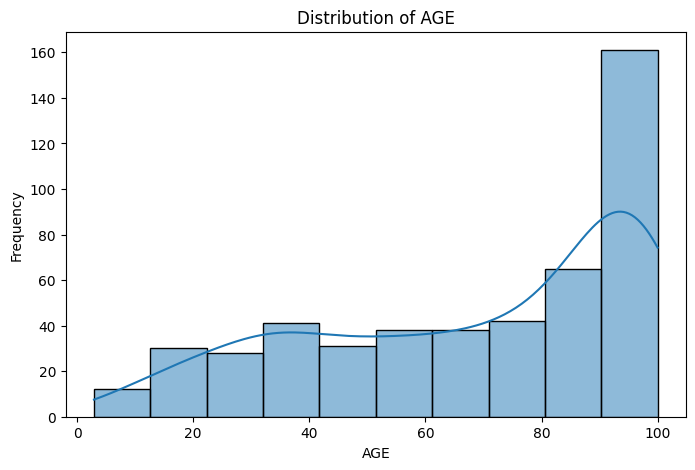

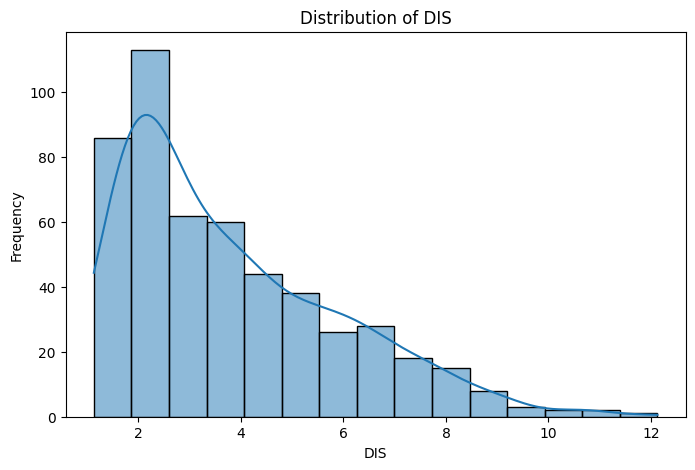

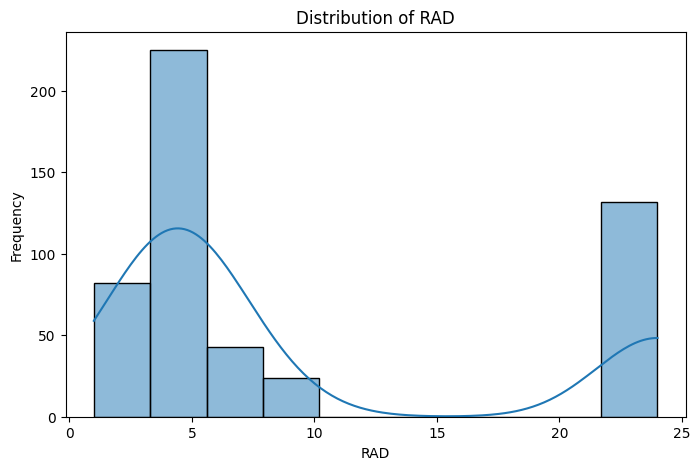

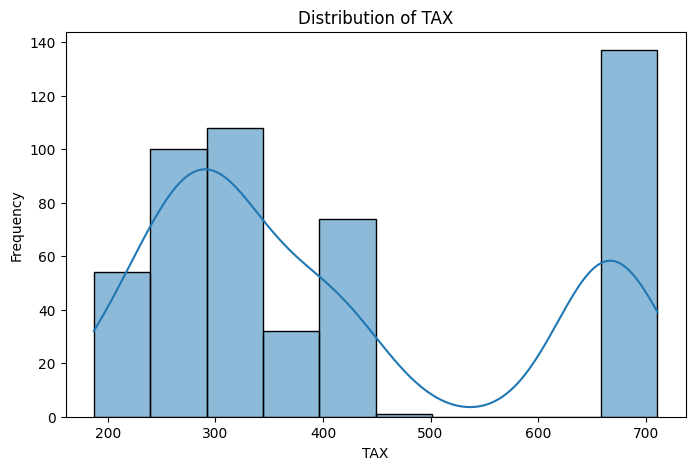

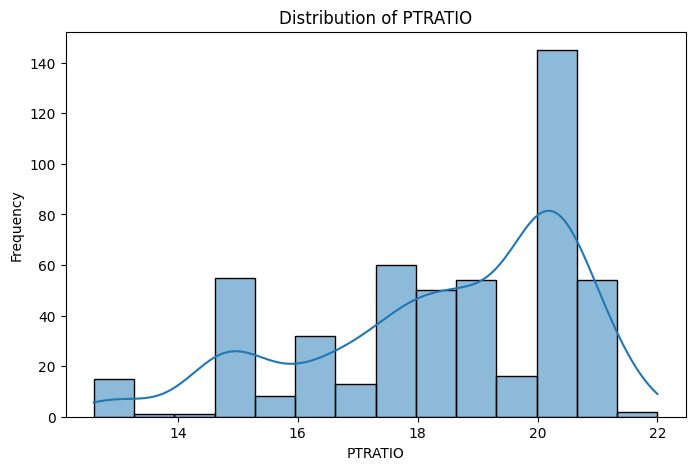

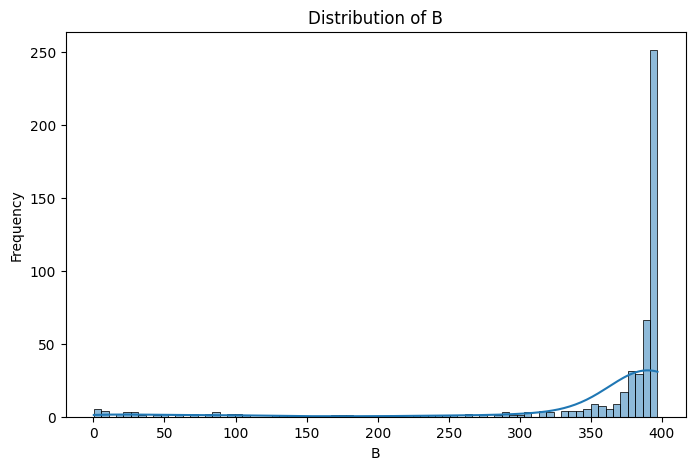

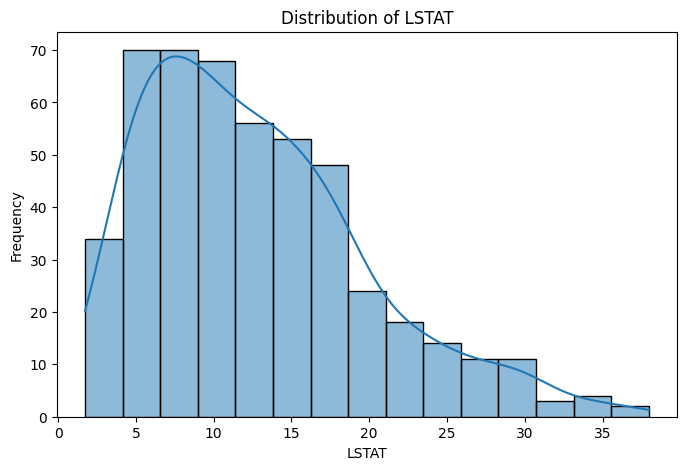

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is a pandas DataFrame
for column in X.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(X[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
left_skewed_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'LSTAT', 'DIS', 'NOX']
right_skewed_features = ['B', 'PTRATIO', 'AGE']
normalized_features = ['RM']
bimodal_features = ['RAD','TAX']